In [ ]:
# IMPORTING ALL THE NECESSARY LIBRARIES FROM KERAS.  #

from keras.layers import  Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from math import floor
import os

In [ ]:
# LOADING THE DATASET FROM GOOGLE DRIVE.

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# WE INTIALIZE THE IMAGE SIZE AS (224*224) AND GIVE THE TRAINING , VALIDATION AND TESTING PATH.

IMAGE_SIZE = [224, 224]

training_path = '/content/drive/MyDrive/Covid19-dataset/train'
validation_path = '/content/drive/MyDrive/Covid19-dataset/val'
testing_path='/content/drive/MyDrive/Covid19-dataset/test'

In [ ]:
# WE IMPORT AND DEFINE THE MOBILENETV2 MODEL AND GIVE THE INPUT SHAPE , WEIGHTS AND PEELING OFF THE FIRST AND LAST LAYER BECAUSE WE ARE  CLASSIFYING ONLY 3 CATEGORIES NOT 1000.

mobilenet_v2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# NOT TRAINING THE EXISTING WEIGHTS BECAUSE WE ARE ALREADY USING THE 'IMAGENET' WEIGHTS.

for layer in mobilenet_v2.layers:
    layer.trainable = False

In [ ]:
# BY USING THE GLOB FUNCTION WE GET THE NO OF OUTPUT CLASSES.

folders_classes = glob('/content/drive/MyDrive/Covid19-dataset/train/*')
print(len(folders_classes)

3


In [ ]:
# IN THIS STEP WE FLATTEN THE LAYERS.

output_prediction = Flatten()(mobilenet_v2.output)

In [ ]:
# NOW WE GIVE THE NO OF CLASSES IN THE DENSE LAYER WITH AN ACTIVATION FUNCTTION OF SOFTMAX.. AND ALSO CREATING THE MODEL BY GIVING THE INPUT AND OUTPUT.

prediction_cov_sars= Dense(len(folders_classes), activation='softmax')(output_prediction)

model_mobile = Model(inputs=mobilenet_v2.input, outputs=prediction_cov_sars)

In [ ]:
model_mobile.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
# WE COMPILE OUR MODEL.
model_mobile.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# USING THE IMAGE-DATA-GENERATOR WE RESCALE, FLIP ,ZOOM AND SHEAR THE TRAINING DATA IMAGES  AND ONLY RESCALE THE VALIDATION DATA IMAGES.

from keras.preprocessing.image import ImageDataGenerator

training_generator_images = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2,

)
valid_generator_images=ImageDataGenerator(
    rescale = 1. / 255,
)


In [ ]:
# GIVING THE TRAINING DIRECTORY WITH TARGET SIZE, BATCH SIZE AND CLASS MODE.
training_set_images = training_generator_images.flow_from_directory('/content/drive/MyDrive/Covid19-dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 15,
                                          class_mode = 'categorical',
                                          )

Found 226 images belonging to 3 classes.


In [ ]:
# CLASS INDICES IS OBTAINED.
training_set_images.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
# GIVING THE VALIDATION DIRECTORY WITH TARGET SIZE, BATCH SIZE AND CLASS MODE.

validation_set_images = valid_generator_images.flow_from_directory('/content/drive/MyDrive/Covid19-dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 15,
                                            class_mode = 'categorical',
                                            )

Found 25 images belonging to 3 classes.


In [ ]:
#FITING THE MODEL.
mobilev2_r = model_mobile.fit(
  training_set_images,
  validation_data=validation_set_images,
  epochs=10,
  steps_per_epoch=len(training_set_images),
  validation_steps=len(validation_set_images)
)

Epoch 1/10
16/16 [==============================] - 90s 5s/step - loss: 3.1698 - accuracy: 0.7080 - val_loss: 10.1405 - val_accuracy: 0.5200
Epoch 2/10
16/16 [==============================] - 19s 1s/step - loss: 1.5366 - accuracy: 0.8850 - val_loss: 1.1122 - val_accuracy: 0.8800
Epoch 3/10
16/16 [==============================] - 19s 1s/step - loss: 0.5055 - accuracy: 0.9204 - val_loss: 2.0897 - val_accuracy: 0.7600
Epoch 4/10
16/16 [==============================] - 20s 1s/step - loss: 0.2019 - accuracy: 0.9646 - val_loss: 0.3441 - val_accuracy: 0.8800
Epoch 5/10
16/16 [==============================] - 20s 1s/step - loss: 0.1813 - accuracy: 0.9558 - val_loss: 0.6466 - val_accuracy: 0.8400
Epoch 6/10
16/16 [==============================] - 20s 1s/step - loss: 0.0867 - accuracy: 0.9867 - val_loss: 0.4098 - val_accuracy: 0.8800
Epoch 7/10
16/16 [==============================] - 20s 1s/step - loss: 0.1506 - accuracy: 0.9646 - val_loss: 0.8016 - val_accuracy: 0.8400
Epoch 8/10
16/16 [=

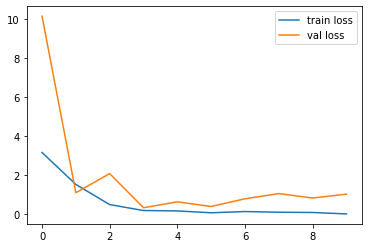

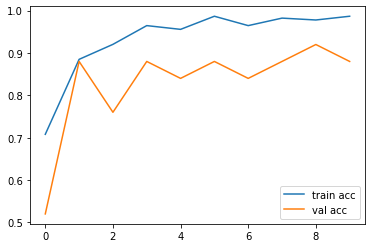

<Figure size 432x288 with 0 Axes>

In [ ]:
# PLOTTING THE ACCURACY, LOSS, VALIDATION LOSS AND VALIDATION ACCURACY.

plt.plot(mobilev2_r.history['loss'], label='train loss')
plt.plot(mobilev2_r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(mobilev2_r.history['accuracy'], label='train acc')
plt.plot(mobilev2_r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# DEFINING TWO EMPTY ARRAYS WHICH CONSITS OF ACTUAL AND PREDICTED VALUES.

y_actual_values=[]
y_test_values=[]

In [ ]:
#LOOPING OVER ALL THE IMAGES OF NORMAL IN THE TESTING DIRECTORY AND PREDICTING IT.

import os
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Normal/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Normal/'+i,target_size=(224,224))
    x_to_arr=image.img_to_array(img)
    x_expand=np.expand_dims(x_to_arr,axis=0)
    img_data=preprocess_input(x_expand)
    model_prediction=model_mobile.predict(img_data)
    predicted=np.argmax(model_prediction, axis=1)
    if(predicted[0]==1):
        y_test_values.append(1)
    else:
        y_test_values.append(0)
    
    y_actual_values.append(1)
    
    

In [ ]:
#LOOPING OVER ALL THE IMAGES OF COVID IN THE TESTING DIRECTORY  AND PREDICTING IT.

for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Covid/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Covid/'+i,target_size=(224,224))
    x_to_arr=image.img_to_array(img)
    x_expand=np.expand_dims(x_to_arr,axis=0)
    img_data=preprocess_input(x_expand)
    model_prediction=model_mobile.predict(img_data)
    predicted=np.argmax(model_prediction, axis=1)
    if(predicted[0]==0):
        y_test_values.append(0)
    else:
        y_test_values.append(1)
        
    y_actual_values.append(0)

In [ ]:
#LOOPING OVER ALL THE IMAGES OF VIRAL PNEUMONIA IN THE TESTING DIRECTORY AND PREDICTING IT.

for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/'+i,target_size=(224,224))
    x_to_arr=image.img_to_array(img)
    x_expand=np.expand_dims(x_to_arr,axis=0)
    img_data=preprocess_input(x_expand)
    model_prediction=model_mobile.predict(img_data)
    predicted=np.argmax(model_prediction, axis=1)
    if(predicted[0]==2):
        y_test_values.append(2)
    else:
        y_test_values.append(0)
        
    y_actual_values.append(2)

In [ ]:
# CONVERTING THE ARRAYS INTO NUMPY ARRAY
y_actual_values=np.array(y_actual_values)
y_test_values=np.array(y_test_values)

In [ ]:
print(y_actual_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
print(y_test_values)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2]


[[25  1  0]
 [ 1 19  0]
 [ 3  0 17]]


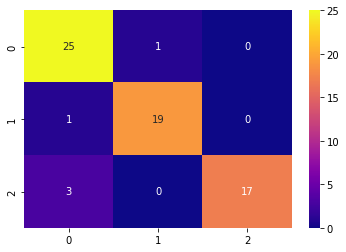

In [ ]:
#PLOTTING THE CONFUSION MATRIX AND GETTING THE ACCURACY, PRECISION ,F-1 SCORE FOR ALL CLASSES AND ALSO THEIR AVERAGES.

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_actual_values,y_test_values)
import seaborn as sns
sns.heatmap(confusion_m,cmap="plasma",annot=True)
print(confusion_m)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_actual_values,y_test_values,digits=3))

              precision    recall  f1-score   support

           0      0.862     0.962     0.909        26
           1      0.950     0.950     0.950        20
           2      1.000     0.850     0.919        20

    accuracy                          0.924        66
   macro avg      0.937     0.921     0.926        66
weighted avg      0.931     0.924     0.924        66



In [ ]:
# OVERALL ACCURACY OF OUR MODEL.

from sklearn.metrics import accuracy_score
accuracy_score(y_actual_values, y_test_values)

0.9242424242424242